In [1]:
import os
path = "C:/pytest/"
os.chdir(path)

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
train = pd.read_csv('뉴스데이터_train.csv', encoding = 'cp949')
test = pd.read_csv('뉴스데이터_test.csv', encoding = 'cp949')

In [4]:
train.isnull().sum()

id        0
날짜        0
분류1       0
분류2    2062
텍스트       0
dtype: int64

In [5]:
data1_train = train.loc[:,['id', '날짜','분류1','텍스트']]
data1_test = test.loc[:,['id','날짜','분류1','텍스트']]

In [6]:
data1_train_classes = data1_train['분류1']
data1_test_classes = data1_test['분류1']

In [7]:
data1_train_class = []
data1_test_class = []
for word in data1_train_classes:
    data1_train_class.append(word.split(',')[0])
for word in data1_test_classes:
    data1_test_class.append(word.split(',')[0])

In [8]:
data1_train['분류1_상위'] = pd.Series(data1_train_class)
data1_test['분류1_상위'] = pd.Series(data1_test_class)

In [9]:
data2_train = train.loc[:,['id', '날짜','분류2','텍스트']]
data2_test = test.loc[:,['id','날짜','분류2','텍스트']]

In [10]:
data2_train.dropna(inplace=True)
data2_test.dropna(inplace = True)

In [11]:
data2_train = data2_train.reset_index(drop = True)
data2_test = data2_test.reset_index(drop = True)

In [12]:
data2_train_classes = data2_train['분류2']
data2_test_classes = data2_test['분류2']
data2_train_class = []
data2_test_class = []
for word in data2_train_classes:
    data2_train_class.append(word.split(',')[0])
for word in data2_test_classes:
    data2_test_class.append(word.split(',')[0])
data2_train['분류2_상위'] = pd.Series(data2_train_class)
data2_test['분류2_상위'] = pd.Series(data2_test_class)

In [13]:
# data1
data1_train_X = data1_train['텍스트']
data1_train_y = data1_train['분류1_상위']
data1_test_X = data1_test['텍스트']
data1_test_y = data1_test['분류1_상위']

# data2
data2_train_X = data2_train['텍스트']
data2_train_y = data2_train['분류2_상위']
data2_test_X = data2_test['텍스트']
data2_test_y = data2_test['분류2_상위']

In [14]:
import rhinoMorph
rn = rhinoMorph.startRhino()

filepath:  C:\Anaconda3\lib\site-packages
classpath:  C:\Anaconda3\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [15]:
from tqdm import tqdm

In [16]:
def auto_morphed(rn, data_text):
    morphed_text = []
    for word in tqdm(data_text):
        morphed_text_lst = rhinoMorph.onlyMorph_list(rn, word, pos = ['NNP','NNG','VV','VA','XR','IC','MM','MAG','MAJ'], eomi = True)
        joined_text = ' '.join(morphed_text_lst)
        morphed_text.append(joined_text)
        morphed_text_series = pd.Series(morphed_text)
    return morphed_text_series

In [17]:
# data1
data1_train_X_morphed = auto_morphed(rn, data1_train_X)
# dat2
data2_train_X_morphed = auto_morphed(rn, data2_train_X)

100%|█████████████████████████████████████████████████████████████████████████████| 4730/4730 [00:05<00:00, 874.18it/s]


In [18]:
text_len = [len(line.split()) for line in data2_train_X_morphed]
print('최소길이 : {}\n최대 길이 : {}\n평균 길이 : {}\n중위수 길이 : {}\n구간별 최대 길이 : {}'.format(np.min(text_len), np.max(text_len), np.round(np.mean(text_len), 1), np.median(text_len), np.percentile(text_len, [0,25,50,75,99,100])))

최소길이 : 4
최대 길이 : 54
평균 길이 : 19.5
중위수 길이 : 19.0
구간별 최대 길이 : [ 4. 16. 19. 22. 35. 54.]


In [56]:
# data1_train_total = pd.concat([data1_train_X_morphed, data1_train_y], axis = 1)
# data1_train_total.columns = ['텍스트','분류1_상위']
# data1_train_total.to_csv('data1_train.csv',encoding = 'cp949', index = False)

In [57]:
# data1_test_total = pd.concat([data1_test_X_morphed, data1_test_y], axis = 1)
# data1_test_total.columns = ['텍스트','분류1_상위']
# data1_test_total.to_csv('data1_test.csv',encoding = 'cp949', index = False)

# data2_test_total = pd.concat([data2_test_X_morphed, data2_test_y], axis = 1)
# data2_test_total.columns = ['텍스트','분류2_상위']
# data2_test_total.to_csv('data2_test.csv',encoding = 'cp949', index = False)

In [58]:
# data2_train_total = pd.concat([data2_train_X_morphed, data2_train_y], axis = 1)
# data2_train_total.columns = ['텍스트','분류2_상위']
# data2_train_total.to_csv('data2_train.csv',encoding = 'cp949', index = False)

In [19]:
max_words = 10000
maxlen = 30
embedding_dim = 200

In [20]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(data1_train_X_morphed)
word_index = tokenizer.word_index

tokenizer2 = Tokenizer(num_words= max_words)
tokenizer2.fit_on_texts(data2_train_X_morphed)

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
# sequencing 
data1_train_X_sequencing = tokenizer.texts_to_sequences(data1_train_X_morphed)
# padding
data1_train_X_padding = pad_sequences(data1_train_X_sequencing, maxlen = maxlen)

In [23]:
# data2 sequencing 
data2_train_X_sequencing = tokenizer2.texts_to_sequences(data2_train_X_morphed)
# padding
data2_train_X_padding = pad_sequences(data2_train_X_sequencing, maxlen = maxlen)

In [24]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(data1_train_y)
data1_train_y_labeling = e.transform(data1_train_y)

In [25]:
# data2
e2 = LabelEncoder()
e2.fit(data2_train_y)
data2_train_y_labeling = e2.transform(data2_train_y)

In [26]:
print(e.classes_, e2.classes_)

['IT_과학' '경제' '국제' '문화' '미분류' '사회' '스포츠' '정치' '지역'] ['IT_과학' '경제' '국제' '문화' '사회' '스포츠' '정치' '지역']


In [27]:
def to_one_hot(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [28]:
data1_train_y_1hot = to_one_hot(data1_train_y_labeling, len(e.classes_))

In [29]:
data2_train_y_1hot = to_one_hot(data2_train_y_labeling, len(e2.classes_))

In [30]:
class_number = len(e.classes_)
class_number2 = len(e2.classes_)

In [86]:
from keras.models import Sequential
from keras import layers, regularizers
model = Sequential()
model.add(layers.Embedding(input_dim = max_words, output_dim = embedding_dim, input_length = maxlen))
# model.add(layers.Bidirectional(layers.LSTM(100,return_sequences = True)))
# model.add(layers.Bidirectional(layers.LSTM(100)))
# model.add(layers.Dense(32, activation = 'relu'))
# model.add(layers.Dense(class_number, activation=  'softmax'))
model.add(layers.LSTM(100))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(class_number, activation=  'softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 30, 200)           2000000   
                                                                 
 lstm_13 (LSTM)              (None, 100)               120400    
                                                                 
 dense_18 (Dense)            (None, 32)                3232      
                                                                 
 dense_19 (Dense)            (None, 9)                 297       
                                                                 
Total params: 2,123,929
Trainable params: 2,123,929
Non-trainable params: 0
_________________________________________________________________


In [33]:
model2 = Sequential()
model2.add(layers.Embedding(input_dim = max_words, output_dim = embedding_dim, input_length = maxlen))
model2.add(layers.Bidirectional(layers.LSTM(100,return_sequences = True)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Bidirectional(layers.LSTM(100)))
model2.add(layers.Dense(32,kernel_regularizer = regularizers.L2(0.0001), activation = 'relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(class_number2, activation=  'softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 200)           2000000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 30, 200)          240800    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 30, 200)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                6432      
                                                                 
 dropout_4 (Dropout)         (None, 32)               

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'acc', patience = 3)

In [87]:
model.compile(loss= 'categorical_crossentropy',optimizer= 'rmsprop',metrics = ['acc'])
history1 = model.fit(data1_train_X_padding, data1_train_y_1hot,epochs = 10, batch_size =32, validation_split= 0.3,verbose = 1)

Epoch 1/10
149/149 [==============================] - 5s 15ms/step - loss: 1.4526 - acc: 0.4947 - val_loss: 1.1259 - val_acc: 0.5947
Epoch 2/10
149/149 [==============================] - 1s 10ms/step - loss: 0.8811 - acc: 0.7005 - val_loss: 1.0852 - val_acc: 0.6173
Epoch 3/10
149/149 [==============================] - 1s 8ms/step - loss: 0.5534 - acc: 0.8286 - val_loss: 0.9595 - val_acc: 0.6943
Epoch 4/10
149/149 [==============================] - 1s 8ms/step - loss: 0.3237 - acc: 0.9043 - val_loss: 1.1329 - val_acc: 0.7085
Epoch 5/10
149/149 [==============================] - 1s 8ms/step - loss: 0.1887 - acc: 0.9430 - val_loss: 1.3768 - val_acc: 0.6963
Epoch 6/10
149/149 [==============================] - 1s 7ms/step - loss: 0.1182 - acc: 0.9674 - val_loss: 1.3760 - val_acc: 0.7046
Epoch 7/10
149/149 [==============================] - 1s 7ms/step - loss: 0.0713 - acc: 0.9832 - val_loss: 1.5035 - val_acc: 0.7120
Epoch 8/10
149/149 [==============================] - 1s 7ms/step - loss: 

In [36]:
# model2.compile(loss= 'categorical_crossentropy',optimizer= 'rmsprop',metrics = ['acc'])
# model2.fit(data2_train_X_padding, data2_train_y_1hot,epochs = 100, batch_size =32, validation_split= 0.3,verbose = 1,callbacks = [es])

Epoch 1/100
104/104 [==============================] - 13s 35ms/step - loss: 1.7910 - acc: 0.3189 - val_loss: 1.5252 - val_acc: 0.4264
Epoch 2/100
104/104 [==============================] - 2s 23ms/step - loss: 1.4082 - acc: 0.4745 - val_loss: 1.4123 - val_acc: 0.5060
Epoch 3/100
104/104 [==============================] - 2s 20ms/step - loss: 1.1090 - acc: 0.6025 - val_loss: 1.4452 - val_acc: 0.5469
Epoch 4/100
104/104 [==============================] - 2s 20ms/step - loss: 0.8515 - acc: 0.7131 - val_loss: 1.5334 - val_acc: 0.5469
Epoch 5/100
104/104 [==============================] - 2s 21ms/step - loss: 0.6553 - acc: 0.7883 - val_loss: 1.7221 - val_acc: 0.5462
Epoch 6/100
104/104 [==============================] - 2s 21ms/step - loss: 0.4977 - acc: 0.8417 - val_loss: 2.1023 - val_acc: 0.5370
Epoch 7/100
104/104 [==============================] - 2s 20ms/step - loss: 0.3642 - acc: 0.8961 - val_loss: 2.1956 - val_acc: 0.5736
Epoch 8/100
104/104 [==============================] - 2s 21m

In [37]:
# data1 test
data1_test_X_morphed = auto_morphed(rn, data1_test_X)

100%|█████████████████████████████████████████████████████████████████████████████| 2265/2265 [00:03<00:00, 666.72it/s]


In [38]:
# data2 test
data2_test_X_morphed = auto_morphed(rn, data2_test_X)

100%|█████████████████████████████████████████████████████████████████████████████| 1593/1593 [00:02<00:00, 756.70it/s]


In [39]:
# data1
# sequencing
data1_test_X_sequencing = tokenizer.texts_to_sequences(data1_test_X_morphed)
# padding
data1_test_X_padding = pad_sequences(data1_test_X_sequencing, maxlen = maxlen)

In [40]:
# data2
# sequencing
data2_test_X_sequencing = tokenizer2.texts_to_sequences(data2_test_X_morphed)
# padding
data2_test_X_padding = pad_sequences(data2_test_X_sequencing, maxlen = maxlen)

In [41]:
# data1 test_y
data1_test_y_labeling= e.transform(data1_test_y)
data1_test_y_1hot = to_one_hot(data1_test_y_labeling, class_number)

In [42]:
# data2 test_y
data2_test_y_labeling= e2.transform(data2_test_y)
data2_test_y_1hot = to_one_hot(data2_test_y_labeling, class_number2)

In [88]:
# data1 분류1
eval1 = model.evaluate(data1_test_X_padding, data1_test_y_1hot)

71/71 [==============================] - 0s 3ms/step - loss: 1.9883 - acc: 0.7046


[1.816127061843872, 0.693598210811615]

In [44]:
# data2 분류2
model2.evaluate(data2_test_X_padding, data2_test_y_1hot)

50/50 [==============================] - 0s 7ms/step - loss: 5.9999 - acc: 0.5625


[5.999931335449219, 0.5624607801437378]

In [69]:
epochs_range = range(0,10)

In [89]:
val_acc1 = history1.history['val_acc']
val_loss1 = history1.history['val_loss']
val_acc2 = history2.history['val_acc']
val_loss2 = history2.history['val_loss']
val_acc3 = history3.history['val_acc']
val_loss3 = history3.history['val_loss']
val_acc4 = history4.history['val_acc']
val_loss4 = history4.history['val_loss']
val_acc5 = history5.history['val_acc']
val_loss5 = history5.history['val_loss']

In [65]:
import matplotlib.pyplot as plt

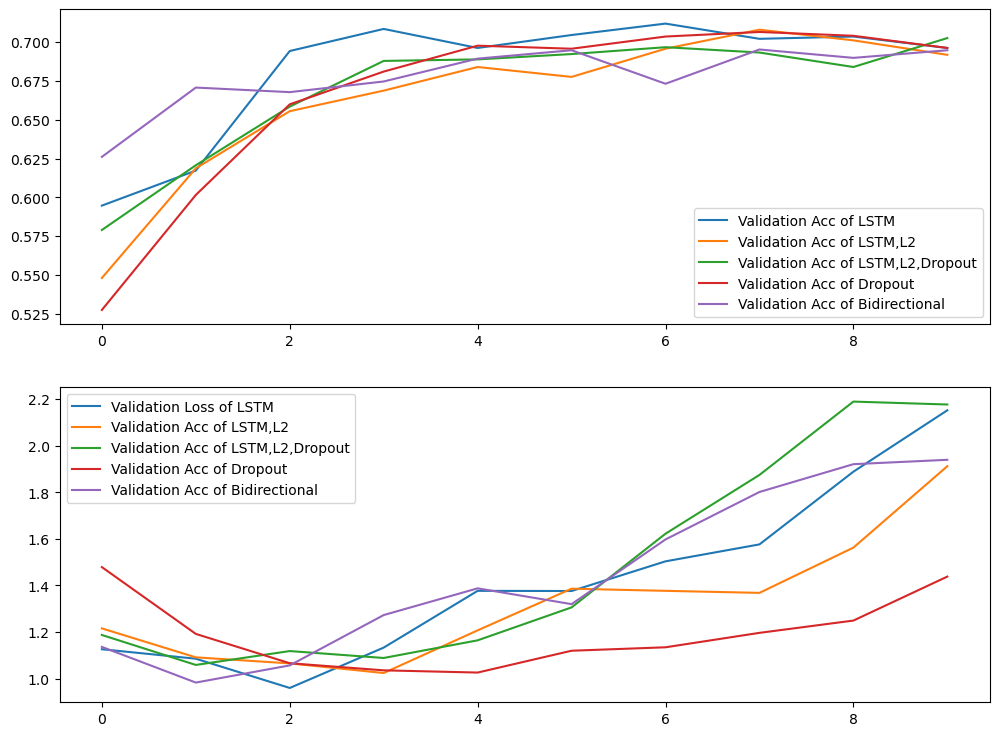

In [93]:
plt.figure(figsize = (12,9))
plt.subplot(211)
plt.plot(epochs_range, val_acc1,label='Validation Acc of LSTM')
plt.plot(epochs_range, val_acc2,label='Validation Acc of LSTM,L2')
plt.plot(epochs_range, val_acc3,label='Validation Acc of LSTM,L2,Dropout')
plt.plot(epochs_range, val_acc4,label='Validation Acc of Dropout')
plt.plot(epochs_range, val_acc5,label='Validation Acc of Bidirectional')
plt.legend()
plt.subplot(212)
plt.plot(epochs_range, val_loss1,label='Validation Loss of LSTM')
plt.plot(epochs_range, val_loss2,label='Validation Loss of LSTM,L2')
plt.plot(epochs_range, val_loss3,label='Validation Loss of LSTM,L2,Dropout')
plt.plot(epochs_range, val_loss4,label='Validation Loss of Dropout')
plt.plot(epochs_range, val_loss5,label='Validation Loss of Bidirectional')
plt.legend()
plt.show()

In [95]:
eval_lst = [eval1, eval2, eval3,eval4,eval5]

In [97]:
eval_lst1 = ['LSTM','LSTM,L2','LSTM,L2,Dropout','Dropout','Bidirectional']

In [100]:
pd.concat([pd.Series(eval_lst1, name = 'model'),pd.DataFrame(eval_lst, columns = ['loss','acc'])], axis =1)

,model,loss,acc
0,LSTM,1.988298,0.704636
1,"LSTM,L2",1.816127,0.693598
2,"LSTM,L2,Dropout",2.029336,0.700221
3,Dropout,1.320263,0.717881
4,Bidirectional,1.874790,0.696247
